In [17]:
import numpy as np
import pandas as pd

## Задание

In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [36]:
# Прочтите CSV-файл и преобразуйте "?" в NaN
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]
df = pd.read_csv("https://github.com/dm-fedorov/pandas_basic/blob/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/imports-85.data?raw=True",
                  header=None, names=headers, na_values="?" )
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_size        205 non

In [35]:
mis_val = df.isnull().sum()
mis_val_percent = 100 * df.isnull().mean().round(1)
mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1).round(1)
mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
mis_val_table_ren_columns


,Missing Values,% of Total Values
symboling,0,0.0
make,0,0.0
fuel_type,0,0.0
aspiration,0,0.0
num_doors,0,0.0
body_style,0,0.0
drive_wheels,0,0.0
engine_location,0,0.0
wheel_base,0,0.0
length,0,0.0


In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# plotly standard imports
# import plotly.graph_objs as go
# import chart_studio.plotly as py
# from plotly.offline import iplot
#cufflinks.go_offline()

# Cufflinks wrapper on plotly
#import cufflinks



In [23]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


<AxesSubplot:>

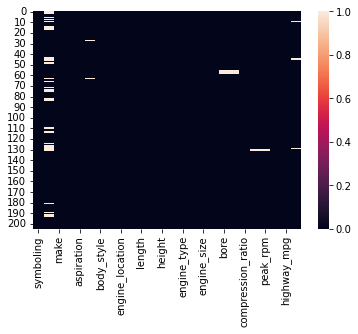

In [24]:
sns.heatmap(df.isnull())

1. Удалить столбец, на 20% заполненный Nan

In [38]:
df.drop("normalized_losses", axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   make               205 non-null    object 
 2   fuel_type          205 non-null    object 
 3   aspiration         205 non-null    object 
 4   num_doors          203 non-null    object 
 5   body_style         205 non-null    object 
 6   drive_wheels       205 non-null    object 
 7   engine_location    205 non-null    object 
 8   wheel_base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb_weight        205 non-null    int64  
 13  engine_type        205 non-null    object 
 14  num_cylinders      205 non-null    object 
 15  engine_size        205 non-null    int64  
 16  fuel_system        205 non

2. Удалить строки, в которых числовые атрибуты имеют по два пропущенных значения

In [39]:
df.dropna(subset=['horsepower', 'peak_rpm'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          203 non-null    int64  
 1   make               203 non-null    object 
 2   fuel_type          203 non-null    object 
 3   aspiration         203 non-null    object 
 4   num_doors          201 non-null    object 
 5   body_style         203 non-null    object 
 6   drive_wheels       203 non-null    object 
 7   engine_location    203 non-null    object 
 8   wheel_base         203 non-null    float64
 9   length             203 non-null    float64
 10  width              203 non-null    float64
 11  height             203 non-null    float64
 12  curb_weight        203 non-null    int64  
 13  engine_type        203 non-null    object 
 14  num_cylinders      203 non-null    object 
 15  engine_size        203 non-null    int64  
 16  fuel_system        203 non

3.	Заменить на топовое значение пропуски в категориальных признаках

In [40]:
top=df["num_doors"].describe()['top']
df["num_doors"]=df["num_doors"].fillna(top)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          203 non-null    int64  
 1   make               203 non-null    object 
 2   fuel_type          203 non-null    object 
 3   aspiration         203 non-null    object 
 4   num_doors          203 non-null    object 
 5   body_style         203 non-null    object 
 6   drive_wheels       203 non-null    object 
 7   engine_location    203 non-null    object 
 8   wheel_base         203 non-null    float64
 9   length             203 non-null    float64
 10  width              203 non-null    float64
 11  height             203 non-null    float64
 12  curb_weight        203 non-null    int64  
 13  engine_type        203 non-null    object 
 14  num_cylinders      203 non-null    object 
 15  engine_size        203 non-null    int64  
 16  fuel_system        203 non

4. Заменить на медианное значение пропуски во всех числовых атрибутах

In [41]:
df["bore"]=df["bore"].fillna(np.median)
df["stroke"]=df["stroke"].fillna(np.median)
df["price"]=df["price"].fillna(np.median)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          203 non-null    int64  
 1   make               203 non-null    object 
 2   fuel_type          203 non-null    object 
 3   aspiration         203 non-null    object 
 4   num_doors          203 non-null    object 
 5   body_style         203 non-null    object 
 6   drive_wheels       203 non-null    object 
 7   engine_location    203 non-null    object 
 8   wheel_base         203 non-null    float64
 9   length             203 non-null    float64
 10  width              203 non-null    float64
 11  height             203 non-null    float64
 12  curb_weight        203 non-null    int64  
 13  engine_type        203 non-null    object 
 14  num_cylinders      203 non-null    object 
 15  engine_size        203 non-null    int64  
 16  fuel_system        203 non